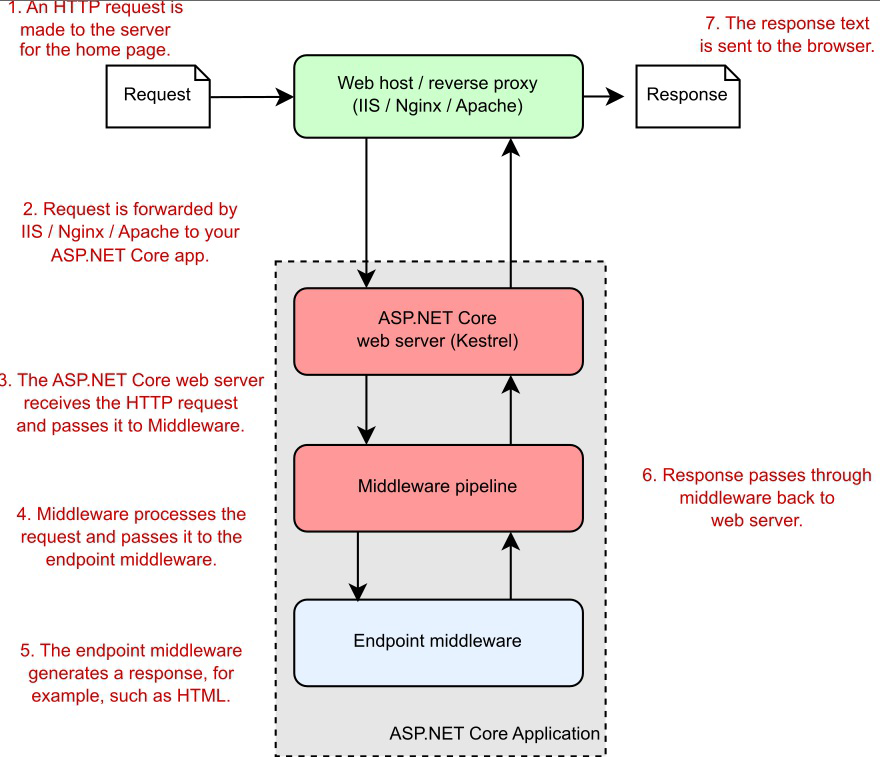

***reverse proxy*** a common `deployment pattern` for ***ASP.NET Core applications***.

The **first port** of call after the **reverse proxy** forwards a request is the
***ASP.NET Core web server***, which is the default cross-platform `Kestrel server`.  

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<code>kestrel</code> تنها گزینه برای http server در asp.net نیست و قابلیت جایگزینی با سایر وب سرور ها را دارد وب سرور هایی که می توانیم استفاده کنیم، عبارت اند از:  
<ol><li><p><strong>Kestrel:</strong></p><ul><li><code>Kestrel</code> یکی از سرورهای HTTP موجود در ASP.NET Core است. این سرور به دلیل عملکرد بالا و قابلیت اجرا در چندین سیستم‌عامل (cross-platform) شناخته شده است. این بدان معناست که می‌توان Kestrel را در ویندوز، لینوکس و مک استفاده کرد.</li></ul></li><li><p><strong>سرور IIS HTTP:</strong></p><ul><li>وقتی برنامه‌ای در ASP.NET Core در محیط <code>Internet Information Services (IIS)</code> اجرا می‌شود، از یک سرور وب متفاوت به نام <code>IIS HTTP Server</code> استفاده می‌کند. این سرور فقط در محیط ویندوز قابل استفاده است و به صورت داخلی (inprocess) با IIS کار می‌کند. یعنی فرآیند وب‌سرور و فرآیند اپلیکیشن در یک فضای پردازشی مشترک اجرا می‌شوند.</li></ul></li><li><p><strong>HTTP.sys:</strong></p><ul><li>گزینه دیگر سرور وب در ASP.NET Core <code>HTTP.sys</code> است که فقط در ویندوز اجرا می‌شود. <code>HTTP.sys</code> نمی‌تواند با IIS استفاده شود و مستقل از آن عمل می‌کند. این سرور برای برنامه‌هایی که نیاز به عملکرد بالا و ویژگی‌های خاص ویندوز دارند، مفید است.</li></ul></li></ol>
</div>

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">

<p><strong>پیکربندی IIS به عنوان Reverse Proxy :</strong></p>

<ul><li>شما IIS را طوری پیکربندی می‌کنید که به عنوان یک reverse proxy عمل کند. این کار با نصب ماژول ASP.NET Core Module (ANCM) انجام می‌شود که مسئول مدیریت اتصال بین IIS و Kestrel است.</li></ul>

<p><strong>عملکرد IIS به عنوان Reverse Proxy:</strong></p><ul><li>هنگامی که یک درخواست به دامنه شما می‌آید، IIS این درخواست را دریافت می‌کند و سپس آن را به Kestrel که در پشت IIS اجرا می‌شود، ارسال می‌کند. Kestrel درخواست را پردازش می‌کند و پاسخ را به IIS برمی‌گرداند، و سپس IIS پاسخ را به کاربر می‌فرستد.</li></ul>

<h4>چرا از این روش استفاده می‌شود؟</h4>

<ul><li><strong>امنیت:</strong> IIS می‌تواند وظایف امنیتی مانند اعتبارسنجی و مدیریت SSL/TLS را انجام دهد و Kestrel را از این مسئولیت‌ها معاف کند.</li><li><strong>پایداری و مدیریت:</strong> IIS امکانات مدیریت پیشرفته‌ای مانند مدیریت درخواست‌ها، لاگینگ و ابزارهای پیکربندی را فراهم می‌کند.</li><li><strong>قابلیت اطمینان:</strong> IIS می‌تواند با استفاده از ویژگی‌هایی مانند Application Pool، افزونگی و مدیریت خطاها را بهبود بخشد.</li></ul>
</div>

 ***Kestrel*** takes the **raw incoming network request** and uses it to generate an `HttpContext` object that the rest of the application can use.

### HttpContext

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<ol><li><p><strong>HttpContext چیست؟</strong></p><ul><li><code>HttpContext</code> یک کلاس در ASP.NET Core است که اطلاعات مربوط به یک درخواست وب (HTTP request) را نگه می‌دارد. این کلاس به عنوان یک "جعبه ذخیره‌سازی" برای یک درخواست خاص عمل می‌کند.</li></ul></li><li><p><strong>استفاده از HttpContext:</strong></p><ul><li>برنامه وب از <code>HttpContext</code> برای ذخیره هر چیزی که به آن درخواست خاص و پاسخ بعدی آن مربوط می‌شود، استفاده می‌کند. این موارد می‌تواند شامل خواص درخواست، سرویس‌های خاص درخواست، داده‌های بارگذاری شده یا خطاهای رخ داده باشد.</li></ul></li><li><p><strong>پر کردن HttpContext:</strong></p><ul><li>سرور وب (web server) در ابتدا <code>HttpContext</code> را با جزئیات درخواست HTTP اصلی و دیگر جزئیات پیکربندی پر می‌کند. سپس این <code>HttpContext</code> به بخش‌های دیگر برنامه پاس داده می‌شود تا مورد استفاده قرار گیرد.</li></ul></li><li><p><strong>جزئیات درخواست HTTP:</strong></p><ul><li>این جزئیات می‌تواند شامل اطلاعاتی مانند مسیر درخواست شده، هدرها (headers)، پارامترهای query string، و محتوای درخواست (request body) باشد.</li></ul></li><li><p><strong>کاربردها در برنامه:</strong></p><ul><li>برنامه می‌تواند از <code>HttpContext</code> برای دسترسی به اطلاعات مربوط به درخواست و همچنین ذخیره و بازیابی داده‌های مرتبط با آن درخواست استفاده کند. برای مثال:<ul><li>دسترسی به اطلاعات احراز هویت (authentication) و مجوزها (authorization)</li><li>ذخیره و بازیابی داده‌های مربوط به جلسه کاربر (user session)</li><li>مدیریت خطاهای خاص درخواست</li></ul></li></ul></li></ol>
</div>

### dotnet CLI

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">

<h4>معرفی .NET CLI</h4>
<p>.NET CLI (Command Line Interface) یک رابط خط فرمان برای توسعه و مدیریت پروژه‌های .NET است. این ابزار به توسعه‌دهندگان اجازه می‌دهد تا بسیاری از وظایف روزمره توسعه را از طریق دستورات خط فرمان انجام دهند، بدون نیاز به استفاده از محیط‌های توسعه گرافیکی (IDEs) مانند Visual Studio.</p>
<p>.NET CLI نقش حیاتی در جریان کار توسعه‌دهندگان .NET دارد. این ابزار امکان انجام عملیات مختلفی از جمله ایجاد، ساخت، اجرا، و تست پروژه‌ها را فراهم می‌کند. همچنین به مدیریت بسته‌ها و کتابخانه‌ها، پیکربندی پروژه‌ها، و انتشار برنامه‌ها کمک می‌کند. برخی از کاربردهای مهم .NET CLI عبارتند از:</p>
<ol><li><strong>توسعه سریع‌تر و کارآمدتر</strong>: با استفاده از دستورات خط فرمان، توسعه‌دهندگان می‌توانند به سرعت پروژه‌های جدید ایجاد کنند، کدها را بسازند و اجرا کنند.</li><li><strong>مدیریت نسخه‌های مختلف</strong>: .NET CLI به توسعه‌دهندگان اجازه می‌دهد تا به راحتی بین نسخه‌های مختلف .NET جابجا شوند و نسخه‌های مورد نیاز خود را نصب کنند.</li><li><strong>اتحاد ابزارها و فرآیندها</strong>: .NET CLI به عنوان یک ابزار واحد برای انجام بسیاری از وظایف توسعه، محیط کاری یکپارچه‌تری را فراهم می‌کند.</li><li><strong>قابلیت اسکریپت‌نویسی</strong>: با استفاده از .NET CLI، توسعه‌دهندگان می‌توانند اسکریپت‌هایی برای اتوماسیون وظایف معمول توسعه بنویسند.</li><li><strong>پشتیبانی از CI/CD</strong>: .NET CLI به راحتی با سیستم‌های Continuous Integration و Continuous Deployment (CI/CD) یکپارچه می‌شود و فرآیندهای ساخت و انتشار خودکار را تسهیل می‌کند.</li></ol>
</div>

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">

<h4>نصب و راه‌اندازی .NET CLI</h4>
<p><strong>نصب از طریق نصب‌کننده (Installer):</strong><ul><li>از <a rel="noreferrer" target="_new" href="https://dotnet.microsoft.com/download">صفحه دانلود .NET</a> بازدید کنید.</li><li>نسخه مورد نظر .NET SDK را انتخاب کرده و فایل نصبی مربوطه را دانلود کنید.</li><li>فایل نصبی را اجرا کنید و مراحل نصب را دنبال کنید.</li></ul></p>

<h5>بررسی نسخه‌های نصب شده</h5>
<p>پس از نصب .NET CLI، می‌توانید نسخه نصب شده را با استفاده از دستور زیر بررسی کنید:</p>
</div>

In [ ]:
dotnet --version # بررسی آخرین نسخه نصب شده

dotnet --list-sdks # لیست sdk های نصب شده

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
<h4>دستورات پایه‌ای .NET CLI</h4>
<h5>1. <code>dotnet new</code></h5>
<p>دستور <code>dotnet new</code> برای ایجاد یک پروژه یا فایل جدید در .NET استفاده می‌شود.</p>
</div>

In [ ]:
dotnet new list  # لیست template هایی که میتوان با آنها پروژه جدید ساخت

dotnet new sln -o NrAspCore # ایجاد sln جدید

dotnet new web -o FirstProject # ایجاد پروژه جدید

dotnet sln add .\FirstProject\FirstProject.csproj # اضافه کردن پروژه به فایل sln

dotnet sln list # لیست پروژه هایی که به این solution اضافه شده اند 

dotnet add package Microsoft.EntityFrameworkCore --version 6.0.27  # افزودن یک پکیج به یک پروژه 
# توضیح csproj برای پکیج ها Get-Content -Path "FirstAppCli.csproj"

dotnet restore # گرفتن پکیج های یک پروژه از NUGET

dotnet build

dotnet run

dotnet test

these commands special `restore`, `build`, `run`, `test` very useful in `continuous-integration build pipelines` and `docker file`.  
  
Each command contains switches that can modify its behavior.

In [ ]:
dotnet --help

dotnet new --help

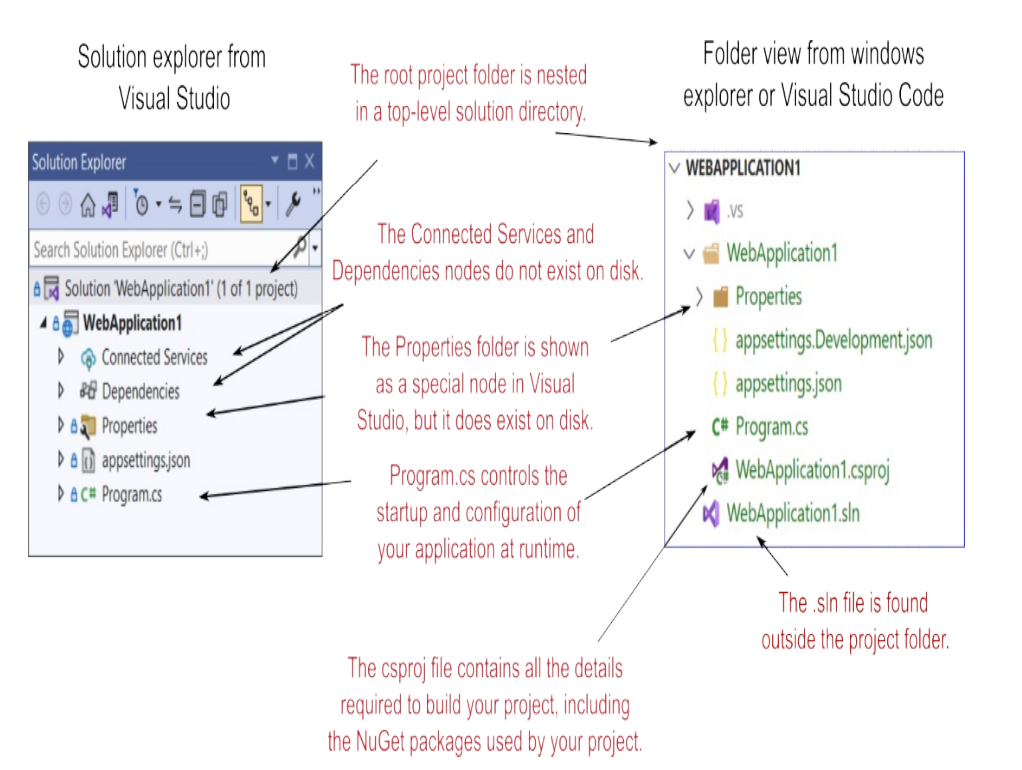

most important file in your project: `.csproj`. This file describes how to `build` your project and `lists any additional NuGet packages` that it requires.

Your project folder contains a subfolder called `Properties`, which contains a single file: `launchSettings.json`. This file controls `how Visual Studio will run and debug the application`.

`Dependencies` and `Connected Services`, they don’t have corresponding folders on disk. they show a collection of all the `dependencies`, such as `NuGet packages`, and `remote services` that the project relies on.

`appsettings.json` and `appsettings.Development.json`. These files provide `configuration settings` that are used at `runtime` to control the behavior of your app.

Compate `.csproj` of `.net framework` and `.netcore`

### Program.cs

All ***ASP.NET Core applications*** start life as a `.NET Console application`.

In [ ]:
var builder = WebApplication.CreateBuilder(args); //bulder pattern

var app = builder.Build();

app.MapGet("/", () => "Hello World!");

app.Run();


asp.net core using `builder pattern` to configure a complex, This technique is useful for allowing users to `configure an object`, delaying its creation until `all
configuration has finished`.

`WebApplicationBuilder` configures a lot of things `by default`, including

- `Configuration` —Your app loads values from JSON files and environment variables that you can use to control the app’s runtime behavior, such as loading connection strings for a database.
- `Logging` —ASP.NET Core includes an extensible logging system for
observability and debugging.

- `Services` —Any classes that your application depends on for providing
functionality

- `Hosting` —ASP.NET Core uses the Kestrel web server by default to
handle requests.


After configuring the WebApplicationBuilder you call `Build()` to `create a WebApplication instance`.

The WebApplication instance is where you define how your application handles and responds to requests, using two building blocks:

- `Middleware`—These small components execute in sequence when the
application receives an HTTP request. They can perform a whole host of
functions, such as logging, identifying the current user for a request,
serving static files, and handling errors.

- `Endpoints` —Endpoints define how the response should be generated for
a specific request to a URL in your app

In [ ]:
//this is an Endpoint
app.MapGet("/", () => "Hello World!"); // this is a minimal api

after the call to `Run()`, the `HTTP server` start `listening` for requests.

structure of a typical ASP.NET Core

- Create a WebApplicationBuilder instance.
- Register the required services and configuration with the WebApplicationBuilder.
- Call Build() on the builder instance to create a WebApplication instance.
- Add middleware to the WebApplication to create a pipeline.
- Map the endpoints in your application.
- Call Run() on the WebApplication to start the server and handle requests.

In [ ]:
using Microsoft.AspNetCore.HttpLogging;

var builder = WebApplication.CreateBuilder(args);

builder.Services.AddHttpLogging(opts =>
    opts.LoggingFields = HttpLoggingFields.RequestProperties);

builder.Logging.AddFilter(
    "Microsoft.AspNetCore.HttpLogging", LogLevel.Information);

var app = builder.Build();

if (app.Environment.IsDevelopment())
{
    app.UseHttpLogging(); //middleware
}

app.MapGet("/", () => "Hello World!"); //endpoint

app.MapGet("/person", () => new Person("Andrew", "Lock")); //endpoint

app.Run();

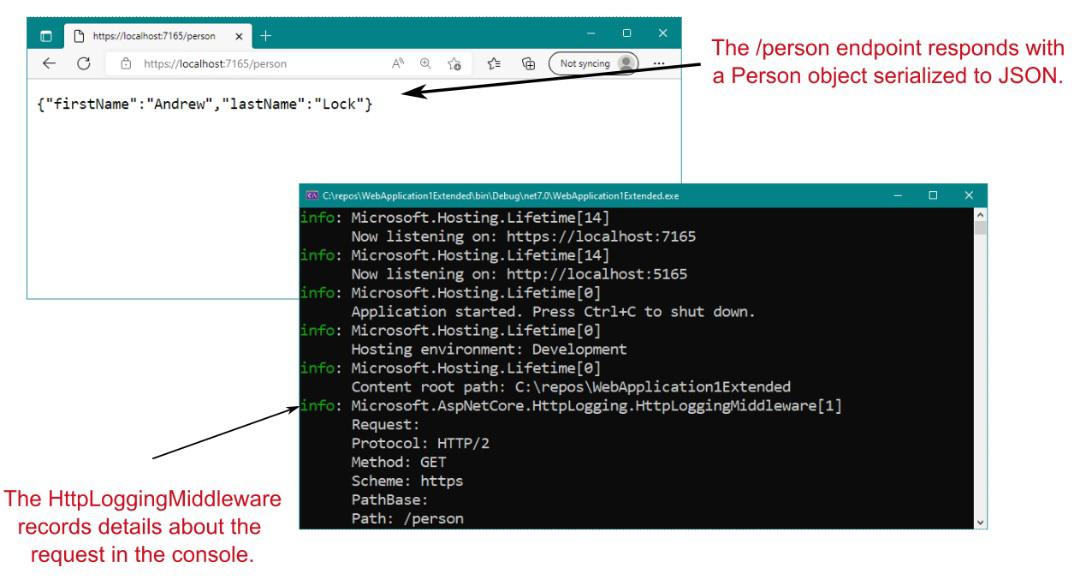

### Adding and configuring services

ASP.NET Core uses `small modular components` for each `distinct feature`.  Within your application, these ***modular components*** are exposed as one or more `services` that are used by the application.

Within the ***context of ASP.Net Core***, `service` refers to any class that `provides functionality` to an application. **Services** could be classes `exposed by a library` or code `you’ve written` for your application.

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn">
موقعی که ما سرویسها را به صورت جداگانه و ماژولار توسعه می دهیم ، یک موضوع مطرح است ، اگر سرویسی نیاز به استفاده از سرویس دیگر داشت، چگونه از آن سرویس استفاده کند
<ul><li>یک راه حل این است که هر سرویسی که نیاز داشتیم را یک نمونه از آن بسازیم 
. این روش دو مشکل دارد
<ul><li>مشکل اول این است که سرویس های ما وابسته می شوند به پیاده سازی سایر سرویس ها ، اگر یک سرویس از سرویس دیگر استفاده کند ، وقتی سرویس استفاده شده تغییر کند، سرویس استفاده کننده هم باید خودش را تغییر دهد، که این اصل <code>Inversion of Controll</code> که یکی از اصول solid است را نقص میکند. </li>
<li>مشکل دیگر این است که اگر ما نمونه سازی از سرویس ها را به عهده یک کلاس بگذاریم، اصل <code>SRP (اولین اصل Solid)</code> را نقص کرده ایم</li></ul></li>

<li>راه حل دوم : استفاده از یک ماژول که وظیفه آن نمونه سازی از ماژولهایی است که خود را به این ماژول معرفی کرده اند ، که به این تکنیک <code>Dependency Injection</code> می گویند ، که با این کار ما اصل <code>Inversion of Control (IoC)</code> را رعایت کرده ایم </li>
</ul>

</div>

You must `register` each **service** with the **container** `before using it` in your application.  
You can use the ***container*** to create both your `own custom application services` and the `framework services`

In an ASP.NET Core application, this ***registration*** is performed by using the `Services` property of `WebApplicationBuilder`.

In [ ]:
builder.Services.AddHttpLogging(opts =>
opts.LoggingFields = HttpLoggingFields.RequestProperties);

Calling `AddHttpLogging()` adds the ***necessary services*** for the `HTTP logging
middleware` to the `IoC container` and `customizes` the options used by the
middleware for what to display

`AddHttpLogging` isn’t exposed directly on the Services property; it’s an `extension method` that provides a convenient way to `encapsulate` all the code required to set up HTTP logging.

### how requests are handled with middleware and endpoints

`Middleware` consists of **small components** that `execute in sequence` when the application `receives an HTTP request`.

***Middleware*** is typically added to WebApplication by calling `Use*` extension methods.

In [ ]:
if (app.Environment.IsDevelopment())
{
    app.UseHttpLogging();
}

It’s important to consider the `order` of **middleware** when adding it to the
pipeline, as middleware can use ***only objects*** `created earlier` in the pipeline.

***WebApplication*** `automatically` adds more middleware, including two of the
most important and substantial pieces of middleware in the pipeline: the `routing` middleware and the `endpoint` middleware

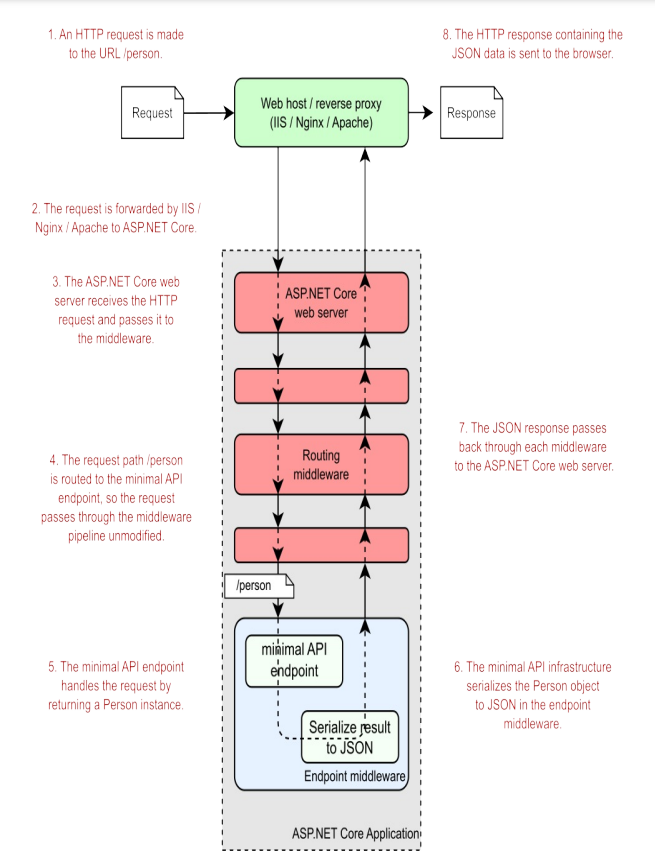